In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k 
from sklearn.metrics import mean_squared_error

In [3]:
covid_data=[]
for i in range(1,3617):
    img= Image.open("Data/COVID/COVID-"+str(i)+".png")
    np_img = np.array(img)
    covid_data.append(np_img)
normal_data=[]
for i in range(1,10192):
    img= Image.open("Data/Normal/Normal-"+str(i)+".png")
    np_img = np.array(img)
    normal_data.append(np_img)
covid_data=np.array(covid_data)
normal_data=np.array(normal_data)
covid_data = covid_data.reshape(covid_data.shape[0], covid_data.shape[1], covid_data.shape[2], 1)
normal_data = normal_data.reshape(normal_data.shape[0], normal_data.shape[1],normal_data.shape[2], 1)
train_covid_images=covid_data[0:400]
train_covid_labels=np.array([1 for i in range(400)])
train_normal_images=normal_data[0:500]
train_normal_labels=np.array([0 for i in range(500)])
X_train=np.append(train_covid_images, train_normal_images)
y_train=np.append(train_covid_labels, train_normal_labels)
X_train=X_train.reshape(900,299,299,1)

test_covid_images=covid_data[1000:1400]
test_covid_labels=np.array([1 for i in range(400)])
test_normal_images=normal_data[1000:1500]
test_normal_labels=np.array([0 for i in range(500)])
X_test=np.append(test_covid_images, test_normal_images)
y_test=np.append(test_covid_labels, test_normal_labels)
X_test=X_test.reshape(900,299,299,1)


indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

X_test = X_test[indices]
y_test = y_test[indices]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
num_category = 2
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_category, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 1
num_epoch = 3

model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))


Epoch 1/3
900/900 ━━━━━━━━━━━━━━━━━━━━ 104s 110ms/step - accuracy: 0.7132 - loss: 0.6517 - val_accuracy: 0.8089 - val_loss: 0.5354
Epoch 2/3
900/900 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.8930 - loss: 0.4603 - val_accuracy: 0.8467 - val_loss: 0.4291
Epoch 3/3
900/900 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.9049 - loss: 0.3501 - val_accuracy: 0.8489 - val_loss: 0.4036


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (1, 297, 297, 64)           │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (1, 148, 148, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (1, 146, 146, 32)           │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (1, 73, 73, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (1, 170528)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 64)                     │      10,913,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 32)                     │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 2)                      │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,805,320 (125.14 MB)

 Trainable params: 10,935,106 (41.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,870,214 (83.43 MB)

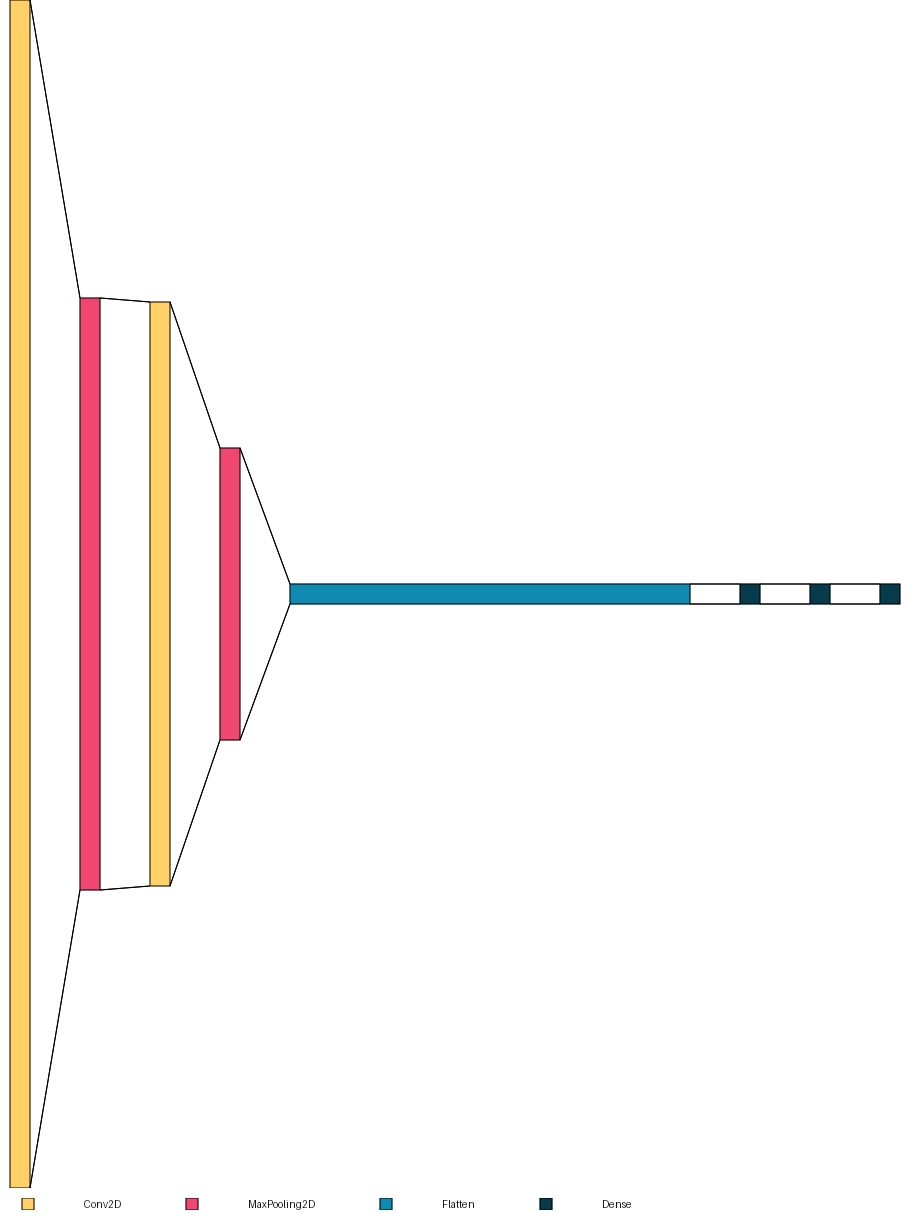

In [7]:
import visualkeras
visualkeras.layered_view(model,legend=True,draw_volume=False,spacing=50)

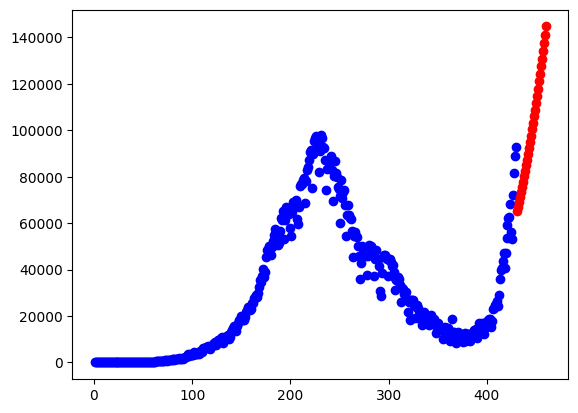

RMSE= 184019.46746284177
The average of true values in the predicted range= 269013.93333333335
The Percentage of error taking rmse and avg of true values as error and true value= 68.40518079590491%


In [9]:
df=pd.read_csv('Data/case_time_series.csv')
df_2=pd.DataFrame()
# print(df)
df_2['Date']=df['Date_YMD']
df_2['Cases']=df['Daily Confirmed']

y=np.array(df_2['Cases'][0:430])
x=np.array([i for i in range(1,431)])
x=x.reshape(430,1)
y=y.reshape(430,1)
poly = PolynomialFeatures(degree = 4)
x_2=np.array([i for i in range(431,461)])
x_2=x_2.reshape(30,1)
lin2 = LinearRegression()
lin2.fit(poly.fit_transform(x), y)
plt.scatter(x, y, color = 'blue')
plt.scatter(x_2, lin2.predict(poly.fit_transform(x_2)), color = 'red')
plt.show()
y_2=np.array(df_2['Cases'][431:461])
pred=lin2.predict(poly.fit_transform(x_2))
rmse=np.sqrt(mean_squared_error(pred, y_2))
print("RMSE= "+str(rmse))
print("The average of true values in the predicted range= "+str(np.average(y_2)))
print("The Percentage of error taking rmse and avg of true values as error and true value= "+str(((rmse/np.average(y_2))*100))+"%")